<a href="https://colab.research.google.com/github/lcpbrandao/Project_Predicao_Cultura_de_Arroz/blob/main/Projeto_Predi%C3%A7%C3%A3o_Cultura_do_Arroz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predição da Cultura de Arroz**
* Autor: Laislla Pinheiro Brandão
* Projeto para a etapa de seleção para a Residência Tecnológica em Ciência de Dados e Analytics para o setor Automotivo.
* Parceria UPE - FCA - Facepe

DESAFIO: 

*   Criar algoritmo que consiga predizer qual a cultura que deve-se plantar, nos próximos anos, para alcançar maior rentabilidade.



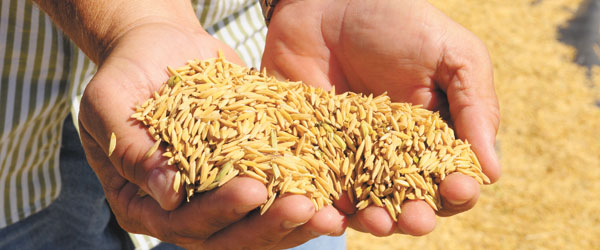


## **1 - COLETA DE DADOS**
#### Conhecendo a base de dados

In [ ]:
#importando as bibliotecas básicas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport

In [ ]:
rice_cultures_BR = pd.read_excel('/content/drive/My Drive/COMPILADO_DATABASE.xlsx')
rice_cultures_BR

,Ano Safra,Cultura Arroz,Região Brasileira,Estado Brasileiro,Área (Em 1.000 ha),Produtividade (Em kg/ha),Produção (Em 1.000 t),Custos variáveis (em R$/ha)
0,2019,ARROZ SEQUEIRO,NORTE,RR,0.0,0,0.0,0.000
1,2019,ARROZ SEQUEIRO,NORTE,RO,42.5,3280,139.4,4849.105
2,2019,ARROZ SEQUEIRO,NORTE,AC,4.9,1306,6.4,4849.105
3,2019,ARROZ SEQUEIRO,NORTE,AM,2.4,2239,5.4,4849.105
4,2019,ARROZ SEQUEIRO,NORTE,AP,1.1,960,1.1,4849.105
...,...,...,...,...,...,...,...,...
207,2015,ARROZ IRRIGADO,SUDESTE,MG,5.5,2580,14.2,7443.840
208,2015,ARROZ IRRIGADO,SUDESTE,SP,8.4,3935,33.1,7443.840
209,2015,ARROZ IRRIGADO,SUL,PR,19.3,5533,106.8,8213.620
210,2015,ARROZ IRRIGADO,SUL,SC,147.4,7139,1052.3,8213.620


## **2 - LIMPEZA E TRANSFORMAÇÃO**
#### Pré processamento dos dados, tratamento de missing values, joins, etc.

In [ ]:
# Contando quantos registros existem no dataframe
rice_cultures_BR.count()

Ano Safra                      212
Cultura Arroz                  212
Região Brasileira              212
Estado Brasileiro              212
Área (Em 1.000 ha)             212
Produtividade (Em kg/ha)       212
Produção (Em 1.000 t)          212
Custos variáveis (em R$/ha)    212
dtype: int64

In [ ]:
# Checando se existem missing values
rice_cultures_BR.isnull().sum()

Ano Safra                      0
Cultura Arroz                  0
Região Brasileira              0
Estado Brasileiro              0
Área (Em 1.000 ha)             0
Produtividade (Em kg/ha)       0
Produção (Em 1.000 t)          0
Custos variáveis (em R$/ha)    0
dtype: int64

In [ ]:
# Contando quantos registros com Área cadastrada igual a ZERO existem no dataframe
rice_cultures_BR.loc[rice_cultures_BR['Área (Em 1.000 ha)'] == 0].count()

Ano Safra                      36
Cultura Arroz                  36
Região Brasileira              36
Estado Brasileiro              36
Área (Em 1.000 ha)             36
Produtividade (Em kg/ha)       36
Produção (Em 1.000 t)          36
Custos variáveis (em R$/ha)    36
dtype: int64

In [ ]:
# Removendo os registros com Área cadastrada igual a ZERO
rice_cultures_BR = rice_cultures_BR.drop(rice_cultures_BR.loc[rice_cultures_BR['Área (Em 1.000 ha)'] == 0].index)

In [ ]:
# Confirmando que não existem mais registros com Área cadastrada igual a ZERO
rice_cultures_BR.loc[rice_cultures_BR['Área (Em 1.000 ha)'] == 0].count()

Ano Safra                      0
Cultura Arroz                  0
Região Brasileira              0
Estado Brasileiro              0
Área (Em 1.000 ha)             0
Produtividade (Em kg/ha)       0
Produção (Em 1.000 t)          0
Custos variáveis (em R$/ha)    0
dtype: int64

In [ ]:
# Contando quantos registros pemaneceram no dataframe
rice_cultures_BR.count()

Ano Safra                      176
Cultura Arroz                  176
Região Brasileira              176
Estado Brasileiro              176
Área (Em 1.000 ha)             176
Produtividade (Em kg/ha)       176
Produção (Em 1.000 t)          176
Custos variáveis (em R$/ha)    176
dtype: int64

## **3 - ANÁLISE E EXPLORAÇÃO**
#### Nesta etapa nosso objetivo é conhecer os dados que estamos trabalhando



In [ ]:
# Estatística descritiva dos dados
rice_cultures_BR.describe()

,Ano Safra,Área (Em 1.000 ha),Produtividade (Em kg/ha),Produção (Em 1.000 t),Custos variáveis (em R$/ha)
count,176.000000,176.000000,176.000000,176.000000,176.000000
mean,2017.005682,53.007386,3857.573864,321.943182,5991.766094
std,1.408128,174.580765,2210.908329,1330.919973,1557.657216
min,2015.000000,0.100000,197.000000,0.200000,3631.832500
25%,2016.000000,1.575000,2035.000000,4.375000,4849.105000
50%,2017.000000,5.400000,3426.000000,20.300000,6169.935000
75%,2018.000000,21.575000,5818.750000,90.300000,7443.840000
max,2019.000000,1100.700000,8500.000000,8728.600000,8213.620000


Analisando a Correlação das colunas da base de dados

In [ ]:
# Calcula a correlação (aqui a correlação calculada é a de )
correlacoes = rice_cultures_BR.corr("pearson")

*   *O coeficiente de correlação varia de `-1` a `1`. 
Se valor é próximo de 1, isto significa que existe uma forte correlação positiva entre as variáveis. Quando esse número é próximo de -1, as variáveis tem uma forte correlação negativa.*

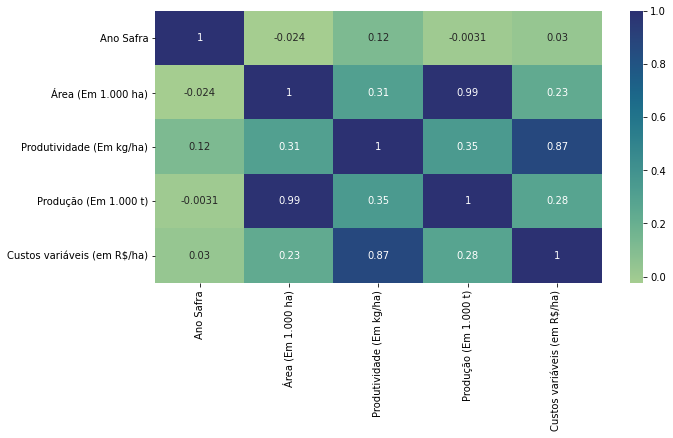

In [ ]:
# Usando o método heatmap do seaborn
plt.figure(figsize=(10, 5))
sns.heatmap(data=correlacoes, cmap = "crest", annot=True)

Visualizando a relação entre algumas features



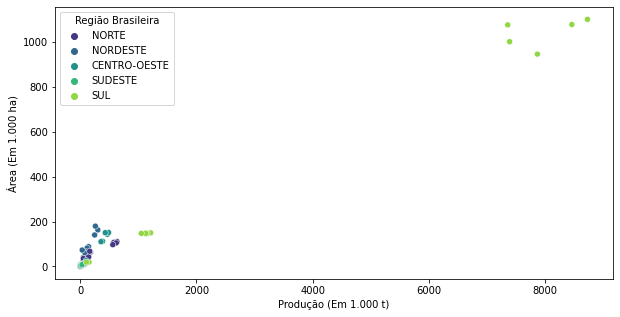

In [ ]:
# Relação entre Produção e Área (por Regiões Brasileiras)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=rice_cultures_BR, x=rice_cultures_BR["Produção (Em 1.000 t)"], y=rice_cultures_BR["Área (Em 1.000 ha)"],palette = "viridis", \
                hue=rice_cultures_BR["Região Brasileira"])

<Figure size 720x360 with 0 Axes>

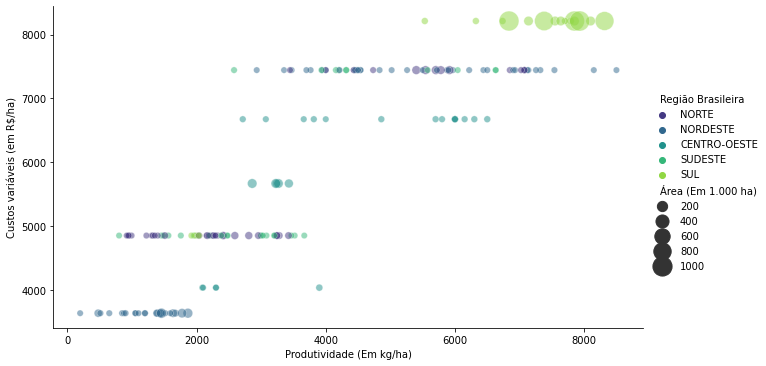

In [ ]:
# Relação entre Produtividade e Custos (por Área e Regiões Brasileiras)
plt.figure(figsize=(10, 5))
sns.relplot(data=rice_cultures_BR, x=rice_cultures_BR["Produtividade (Em kg/ha)"], y=rice_cultures_BR["Custos variáveis (em R$/ha)"], hue=rice_cultures_BR["Região Brasileira"], \
            size=rice_cultures_BR["Área (Em 1.000 ha)"], sizes=(40, 400), alpha=.5, palette="viridis", height=5, aspect=1.8)

<Figure size 720x540 with 0 Axes>

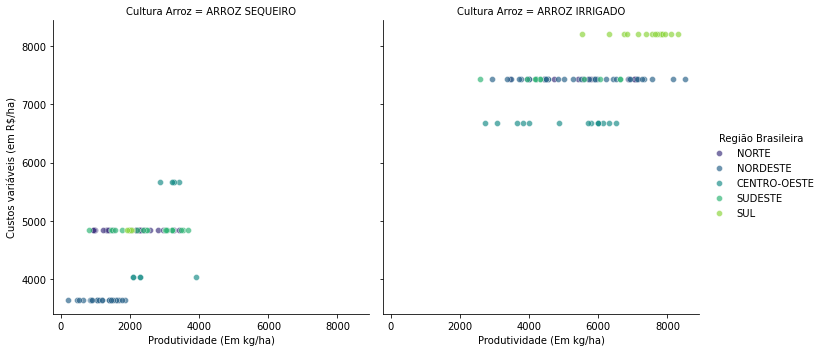

In [ ]:
# Relação entre Produtividade e Custos (por Cultura de Arroz e Estados Brasileiros)
plt.figure(figsize=(10, 7.5))
g = sns.FacetGrid(rice_cultures_BR, col="Cultura Arroz", hue="Região Brasileira", palette="viridis", height=5, aspect=1)
g.map(sns.scatterplot, "Produtividade (Em kg/ha)", "Custos variáveis (em R$/ha)", alpha=.7)
g.add_legend()

Visualizando a distribuição das features

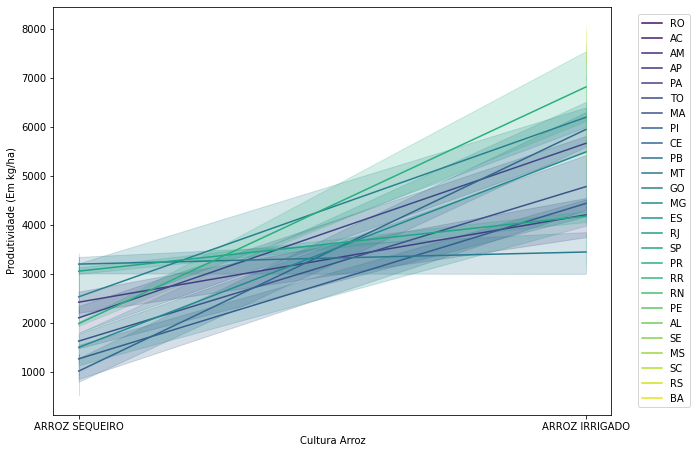

In [ ]:
# Variação da Produtividade média de cada cultura de arroz por Estado
plt.figure(figsize=(10, 7.5))
c = sns.lineplot(data=rice_cultures_BR, x=rice_cultures_BR["Cultura Arroz"], y=rice_cultures_BR["Produtividade (Em kg/ha)"],palette = "viridis", \
                hue=rice_cultures_BR["Estado Brasileiro"])
c.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), ncol=1)

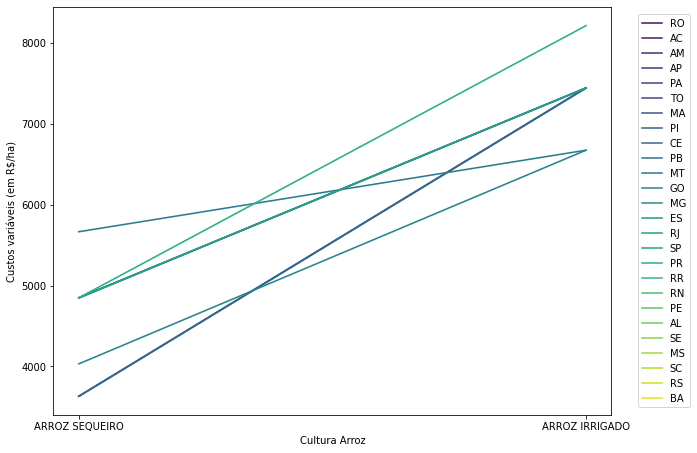

In [ ]:
# Variação do Custo média de cada cultura de arroz por Estado
plt.figure(figsize=(10, 7.5))
p = sns.lineplot(data=rice_cultures_BR, x=rice_cultures_BR["Cultura Arroz"], y=rice_cultures_BR["Custos variáveis (em R$/ha)"],palette = "viridis", \
                hue=rice_cultures_BR["Estado Brasileiro"])
p.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), ncol=1)

<Figure size 720x540 with 0 Axes>

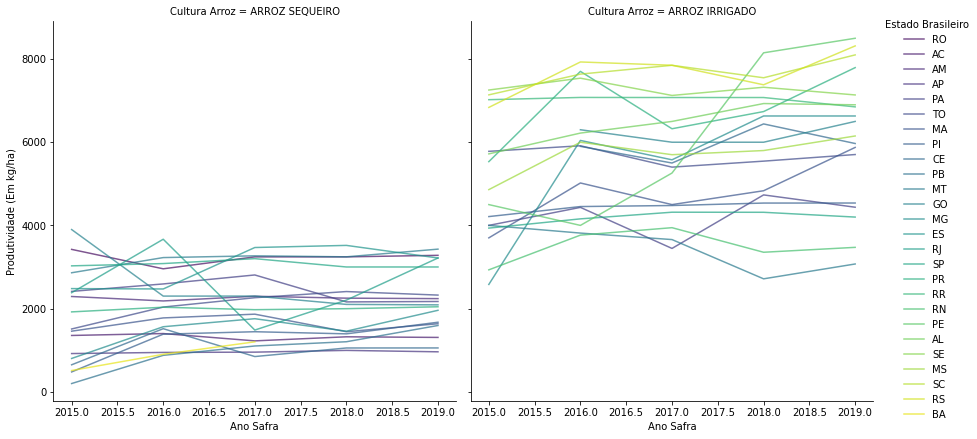

In [ ]:
# Variação da Produtividade ao longo dos anos (por Cultura de Arroz e Estado)
plt.figure(figsize=(10, 7.5))
g = sns.FacetGrid(rice_cultures_BR, col="Cultura Arroz", hue="Estado Brasileiro", palette="viridis", height=6.2, aspect=1)
g.map(sns.lineplot, "Ano Safra", "Produtividade (Em kg/ha)", alpha=.7)
g.add_legend()

<Figure size 720x540 with 0 Axes>

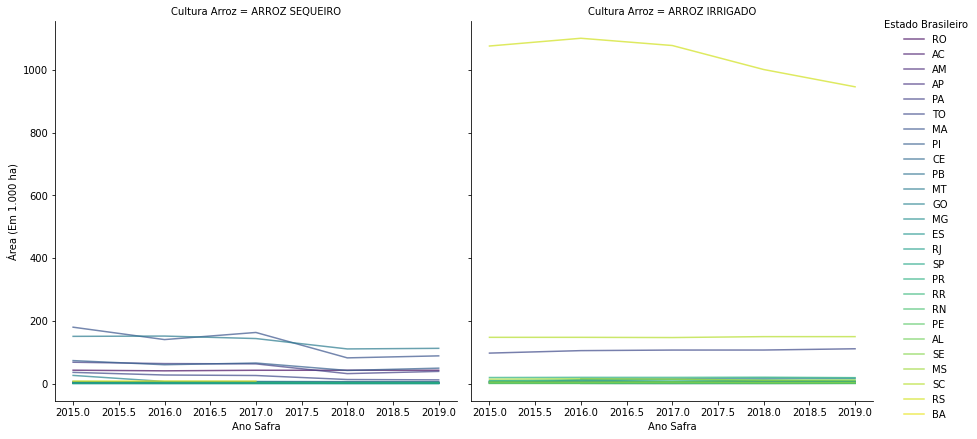

In [ ]:
# Variação da Área plantada ao longo dos anos (por Cultura de Arroz e Estado)
plt.figure(figsize=(10, 7.5))
g = sns.FacetGrid(rice_cultures_BR, col="Cultura Arroz", hue="Estado Brasileiro", palette="viridis", height=6.2, aspect=1)
g.map(sns.lineplot, "Ano Safra", "Área (Em 1.000 ha)", alpha=.7)
g.add_legend()

## **4 - CRIAÇÃO DE MODELOS**

### Otimização Linear e Inteira

"O modelo de Programação Linear visa determinar o valor ótimo de uma função linear, dado um conjunto de restrições lineares de natureza estrita e não estrita. É, pois, um modelo matemático de programação linear, o qual é composto de uma função-objetivo e de restrições técnicas representadas por um grupo de inequações também lineares. A função-objetivo mede a eficiência e desempenho do sistema. As restrições garantem que essas soluções estão de acordo com as limitações técnicas impostas pelo sistema. Existem ainda outras restrições que exigem a não negatividade das variáveis de decisão, o que deverá acontecer sempre que a técnica de abordagem for a de programação linear."

Formulando o problema de otimização usando a biblioteca PuLP do Python

In [ ]:
#Instalando o PuLP
!pip install PuLP

     |████████████████████████████████| 40.6MB 103kB/s 


In [ ]:
#Importando a biblioteca
from pulp import *

Criando o problema de LP com o método LpProblem do PuLP

O modelo de programação linear terá como objetivos a maximização da produção e a minimização de custos de produção de arroz

In [ ]:
#Criando o problema de Otimização (Nesse caso, maximização)
prob = LpProblem("Rice Culture Problem", LpMaximize)
prob # Verifica se o problema foi criado

/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1198: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Rice_Culture_Problem:
MAXIMIZE
None
VARIABLES

In [ ]:
# Atribuindo a tabela com todas as informações coletadas a um dataframe df
df = rice_cultures_BR
df.head()

,Ano Safra,Cultura Arroz,Região Brasileira,Estado Brasileiro,Área (Em 1.000 ha),Produtividade (Em kg/ha),Produção (Em 1.000 t),Custos variáveis (em R$/ha)
1,2019,ARROZ SEQUEIRO,NORTE,RO,42.5,3280,139.4,4849.105
2,2019,ARROZ SEQUEIRO,NORTE,AC,4.9,1306,6.4,4849.105
3,2019,ARROZ SEQUEIRO,NORTE,AM,2.4,2239,5.4,4849.105
4,2019,ARROZ SEQUEIRO,NORTE,AP,1.1,960,1.1,4849.105
5,2019,ARROZ SEQUEIRO,NORTE,PA,38.8,2170,84.2,4849.105


INPUT DE INFORMAÇÕES

In [ ]:
# Estado para o qual deseja-se fazer o estudo
estado_brasileiro = "AC"
# Quantidade de terras disponíveis para o plantio (em ha)
area_disponivel = 115300


VARIÁVEIS

In [ ]:
# Lista dos itens possíveis de cultura de arroz
rice_culture_items = list(df['Cultura Arroz'].loc[(df['Estado Brasileiro'] == estado_brasileiro)].unique())
rice_culture_items

['ARROZ SEQUEIRO']

In [ ]:
# Cria as variáveis de decisão
rice_culture_vars = LpVariable.dicts("Cultura", rice_culture_items, lowBound=0, cat='Continuous')

In [ ]:
# Dicionário para média de todos os custos:
custos = pd.DataFrame(data=df, columns=['Cultura Arroz','Custos variáveis (em R$/ha)']).loc[(df['Estado Brasileiro'] == estado_brasileiro)].groupby(by=['Cultura Arroz']).mean()
custos_items = dict(zip(custos.index,custos['Custos variáveis (em R$/ha)']))
custos_items

{'ARROZ SEQUEIRO': 4849.105}

In [ ]:
# Dicionário para média de todas as produtividades:
produtividades = pd.DataFrame(data=df, columns=['Cultura Arroz','Produtividade (Em kg/ha)']).loc[(df['Estado Brasileiro'] == estado_brasileiro)].groupby(by=['Cultura Arroz']).mean()
produtividades_items = dict(zip(produtividades.index,produtividades['Produtividade (Em kg/ha)']))
produtividades_items

{'ARROZ SEQUEIRO': 1320.4}

FUNÇÃO OBJETIVO

Maximização da Rentabilidade

***Rentabilidade = (Produtividade x Área x Preço de Venda) - Custo***

* Para este problema, assume-se o Preço de venda do kg de arroz como sendo R$5,00, uma vez que este fator está sujeito a muitos outros, como sazonalidade, preço do dólar, oferta e demanda, atividade econômica do país, logistica, etc., e, considerando que os cultivares plantados são os mesmos, o que importa aqui não é o preço de venda do arroz, mas apenas o tipo de cultura do plantio: IRRIGADO ou SEQUEIRO.

In [ ]:
# Função objetivo [(Produtividade_por_ha x Área x Preço de Venda) - (Custo_por_ha x Área)]
#prob += lpSum([produtividades_items[i]*area_disponivel*5*rice_culture_vars[i] for i in rice_culture_items] \
#              and [-custos_items[j]*area_disponivel*rice_culture_vars[j] for j in rice_culture_items])

In [ ]:
# Função objetivo [(Produtividade_por_ha x Área x Preço de Venda) - (Custo_por_ha x Área)]
prob += lpSum( [produtividades_items[i]*5*rice_culture_vars[i] - custos_items[i]*rice_culture_vars[i] for i in rice_culture_items] )

RESTRIÇÕES

In [ ]:
# Área para plantio das culturas
prob += lpSum([rice_culture_vars[k] for k in rice_culture_items]) >= 0 #Limite Inferior (área não pode ser negativa)
prob += lpSum([rice_culture_vars[k] for k in rice_culture_items]) <= area_disponivel #Limite Superior
 
prob # Mostra o problema de otimização linear na forma do modelo padrão

Rice_Culture_Problem:
MAXIMIZE
1752.8950000000004*Cultura_ARROZ_SEQUEIRO + 0.0
SUBJECT TO
_C1: Cultura_ARROZ_SEQUEIRO >= 0

_C2: Cultura_ARROZ_SEQUEIRO <= 115300

VARIABLES
Cultura_ARROZ_SEQUEIRO Continuous

In [ ]:
status = prob.solve() # Solucionar com o solver default
LpStatus[status] # Mostrar o status da solução

'Optimal'

Resultado da Função Objetivo

In [ ]:
obj = value(prob.objective)
print(f"A rentabilidade total para a área disponível é estimada em: R${round(obj/1000000,2)} Milhões, considerando um plantio de:")
for v in prob.variables():
   print(f'{v.varValue:.1f} hectares de {v.name}')

A rentabilidade total para a área disponível é estimada em: R$202.11 Milhões, considerando um plantio de:
115300.0 hectares de Cultura_ARROZ_SEQUEIRO
